In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
companies = pd.read_csv("C:\\Users\\DELL\\Desktop\\companies.csv")
companies.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/5/2010,9/18/2013,5.0,17.0,initial-importer,5/25/2007 6:51,4/13/2013 3:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2/1/2003,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 2:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN


In [ ]:
companies = companies.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1)
companies.head()

In [ ]:
companies = companies.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1)
companies.head()
companies.tail()

In [ ]:
companies.duplicated()


In [ ]:
companies.shape

In [ ]:
companies.duplicated().sum()

In [ ]:
companies.drop_duplicates(subset=None, keep='first',inplace=True)
companies.drop_duplicates()

In [ ]:
companies.isnull()

In [ ]:
companies.dropna()

In [ ]:
companies.describe()

In [ ]:
Q1 = companies.funding_total_usd.quantile(0.25)
Q3 = companies.funding_total_usd.quantile(0.75)
Q1, Q3

In [ ]:
IQR=Q3-Q1
IQR

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

In [ ]:
companies[(companies.funding_total_usd<lower_limit)|(companies.funding_total_usd>upper_limit)]

In [ ]:
companies[(companies.funding_total_usd<lower_limit)&(companies.funding_total_usd>upper_limit)]

In [ ]:
Q1 = companies.funding_rounds.quantile(0.25)
Q3 = companies.funding_rounds.quantile(0.75)
Q1, Q3

In [ ]:
IQR=Q3-Q1
IQR

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit


In [ ]:
companies[(companies.funding_rounds<lower_limit) & (companies.funding_rounds>upper_limit)]

In [ ]:
companies['founded_at'] = pd.to_datetime(companies['founded_at'],format="%m/%d/%Y")
companies['founded_at'] = pd.to_datetime(companies['founded_at'],format="%m/%d/%Y").dt.year

In [ ]:
companies.head()

In [ ]:
companies['closed_at'] = pd.to_datetime(companies['closed_at'],format="%m/%d/%Y")
companies['clossed_at'] = pd.to_datetime(companies['closed_at'],format="%m/%d/%Y").dt.year

In [ ]:
companies.tail()

In [ ]:
unique_category = pd.unique(companies['category_code'])
unique_category, len(unique_category)

In [ ]:
companies.category_code.value_counts().sort_values(ascending=False).head(15)

In [ ]:
def get_category(actual_category):
    
    category_list = ['software','web','ecommerce','advertising','consulting','mobile','games_video','enterprise',
                 'public_relations','network_hosting','hardware','education','search','biotech']
    
    if actual_category in category_list:
        return actual_category
    else:
        return 'other'

In [ ]:
companies['category_code'] = companies.apply(lambda x: get_category(x['category_code']),axis =1)
companies['category_code']

In [ ]:
companies.category_code.value_counts().sort_values(ascending=False)

In [ ]:
category = companies[["category_code"]]
category = pd.get_dummies(category, drop_first= True)
category.head()

In [ ]:
companies = pd.concat([companies, category], axis = 1)
companies

In [ ]:
companies = companies.drop(['category_code'], axis=1)
companies.head()

In [ ]:
unique_country = pd.unique(companies['country_code'])
unique_country, len(unique_country)

In [ ]:
companies.country_code.value_counts().sort_values(ascending=False).head(10)


In [ ]:
def get_country(actual_country):
    
    country_list = ['USA','GBR','IND','CAN','DEU','AUS','FRA','ESP','NLD','ISR','IRL','BRA']

    if actual_country in country_list:
        return actual_country
    else:
        return 'other'
  

In [ ]:
companies['country_code'] = companies.apply(lambda x: get_country(x['country_code']),axis =1)
companies['country_code']

In [ ]:
companies.country_code.value_counts().sort_values(ascending=False)

In [ ]:
country = companies[["country_code"]]
country = pd.get_dummies(country, drop_first= True)
country.head()

In [ ]:
companies = pd.concat([companies, country], axis = 1)
companies

In [ ]:
companies = companies.drop(['country_code'], axis=1)
companies.head()

In [ ]:
def get_isClosed(status):
    if status == 'operating':
        return 1
    elif status == 'ipo':
        return 1
    else:
        return 0

In [ ]:
companies['isClosed'] = companies.apply(lambda x: get_isClosed(x['status']),axis =1)
companies['isClosed']

In [ ]:
unique_isClosed= pd.unique(companies['isClosed'])
unique_isClosed

In [ ]:
unique_closed = pd.unique(companies['closed_at'])
unique_closed

In [ ]:
close_detail = companies['closed_at']
status = companies['status']

closedAt = []
zip_object = zip(status,close_detail)

for status,close_detail in zip_object:
    if (status == 'acquired'):
        close = close_detail
        closedAt.append(close)
    elif (status == 'closed'):
        close = close_detail
        closedAt.append(close)
    else:
        close = '2021'
        closedAt.append(close)
    
company['closed_at'] = pd.DataFrame(closedAt)
company['closed_at']


In [ ]:
companies.dropna(axis=0, subset=['closed_at'],inplace=True)
companies

In [ ]:
unique_closed_at = pd.unique(companies['closed_at'])
unique_closed_at

In [ ]:
closed_at = companies['closed_at']
founded_at = companies['founded_at']

active_days = []
zip_object = zip(closed_at, founded_at)

for closed_at, founded_at in zip_object:
    if float(closed_at) > float(founded_at):       
        days = float(closed_at) - float(founded_at)
        days = 365 * days
        active_days.append(days)
    else:
        index_name = companies[(companies['founded_at'] == founded_at) & (companies['closed_at'] == closed_at)].index
        companies.drop(index_name, inplace = True)
    
companies['active_days'] = pd.DataFrame(active_days)
companies['active_days']

In [ ]:
companies = companies.drop(['closed_at'], axis=1)
companies.head()

In [ ]:
unique_status = pd.unique(companies['status'])
unique_status

In [ ]:
companies['status'] = companies.apply(lambda x: get_status(x['status']),axis =1)
companies['status']

In [ ]:
companies.status.value_counts().sort_values(ascending=False)

In [ ]:
funding_rounds  = companies['funding_rounds'].mean().round()
funding_total_usd  = companies['funding_total_usd'].mean().round()
milestones  = companies['milestones'].mean().round()
# relationships  = company['relationships'].mean().round()

companies['funding_rounds'] = companies['funding_rounds'].fillna(funding_rounds)
companies['funding_total_usd'] = companies['funding_total_usd'].fillna(funding_total_usd)
companies['milestones'] = companies['milestones'].fillna(milestones)
# company['relationships'] = company['relationships'].fillna(relationships)

In [ ]:
companies.isnull().sum()

In [ ]:
companies.dropna(inplace=True)

In [ ]:
companies.reset_index()

In [ ]:
companies.isnull().sum()

In [ ]:
companies.to_csv('CleanedData.csv')

In [31]:
corelation = companies.corr()

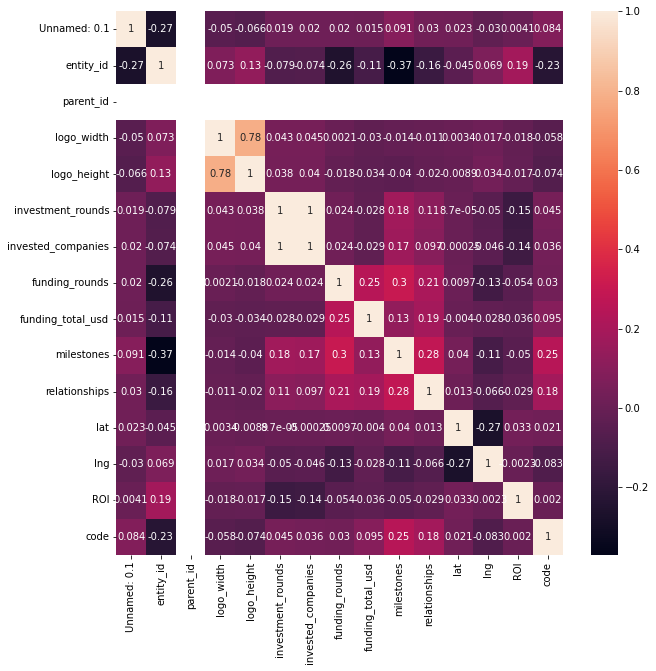

In [32]:
plt.figure(figsize=[10,10])
sns.heatmap(correlation,xticklabels=corelation.columns, yticklabels=correlation.columns,annot=True)
plt.show()


In [15]:
companies.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI', 'code'],
      dtype='object')

In [16]:
companies.nunique()

id                     196553
Unnamed: 0.1           196553
entity_type                 1
entity_id              196553
parent_id                   0
name                   196344
normalized_name        195451
permalink              196512
category_code              42
status                      4
founded_at               6156
closed_at                 925
domain                 125498
homepage_url           125961
twitter_username        79571
logo_url               110110
logo_width               3325
logo_height              2128
short_description        7126
description             83695
overview               126513
tag_list                79108
country_code              175
state_code                 51
city                    10652
region                   5847
first_investment_at      1197
last_investment_at       1105
investment_rounds          41
invested_companies         37
first_funding_at         3208
last_funding_at          2978
funding_rounds             15
funding_to

In [34]:
companies = companies.select_dtypes(include=[np.number])

In [35]:
companies.columns

Index(['Unnamed: 0.1', 'entity_id', 'parent_id', 'logo_width', 'logo_height',
       'investment_rounds', 'invested_companies', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'ROI',
       'code'],
      dtype='object')

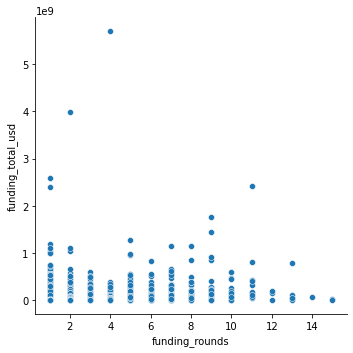

In [36]:
sns.relplot(x='funding_rounds', y='funding_total_usd',data=companies)

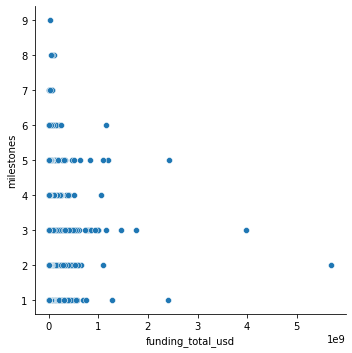

In [37]:
sns.relplot(x='funding_total_usd', y='milestones', data=companies)

<AxesSubplot:xlabel='funding_total_usd', ylabel='Density'>

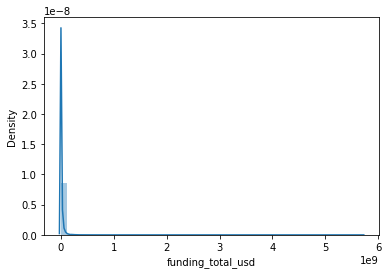

In [38]:
sns.distplot(companies['funding_total_usd'])

<AxesSubplot:xlabel='funding_rounds', ylabel='Density'>

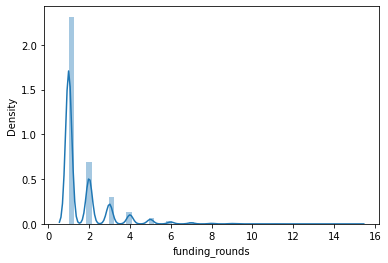

In [39]:
sns.distplot(companies['funding_rounds'])

<AxesSubplot:xlabel='funding_total_usd'>

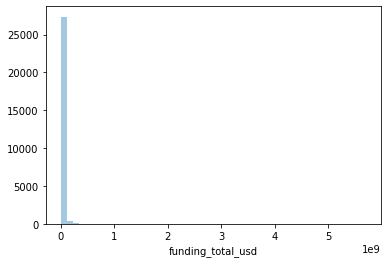

In [40]:
sns.distplot(companies['funding_total_usd'],kde=False)

<AxesSubplot:xlabel='funding_rounds'>

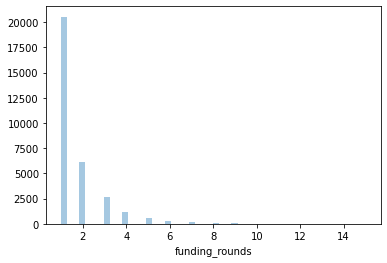

In [41]:
sns.distplot(companies['funding_rounds'],kde=False)

<AxesSubplot:xlabel='funding_rounds'>

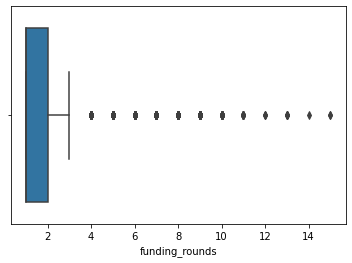

In [42]:
sns.boxplot(companies['funding_rounds'])

<AxesSubplot:xlabel='funding_total_usd'>

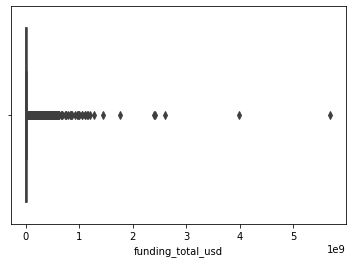

In [43]:
sns.boxplot(companies['funding_total_usd'])


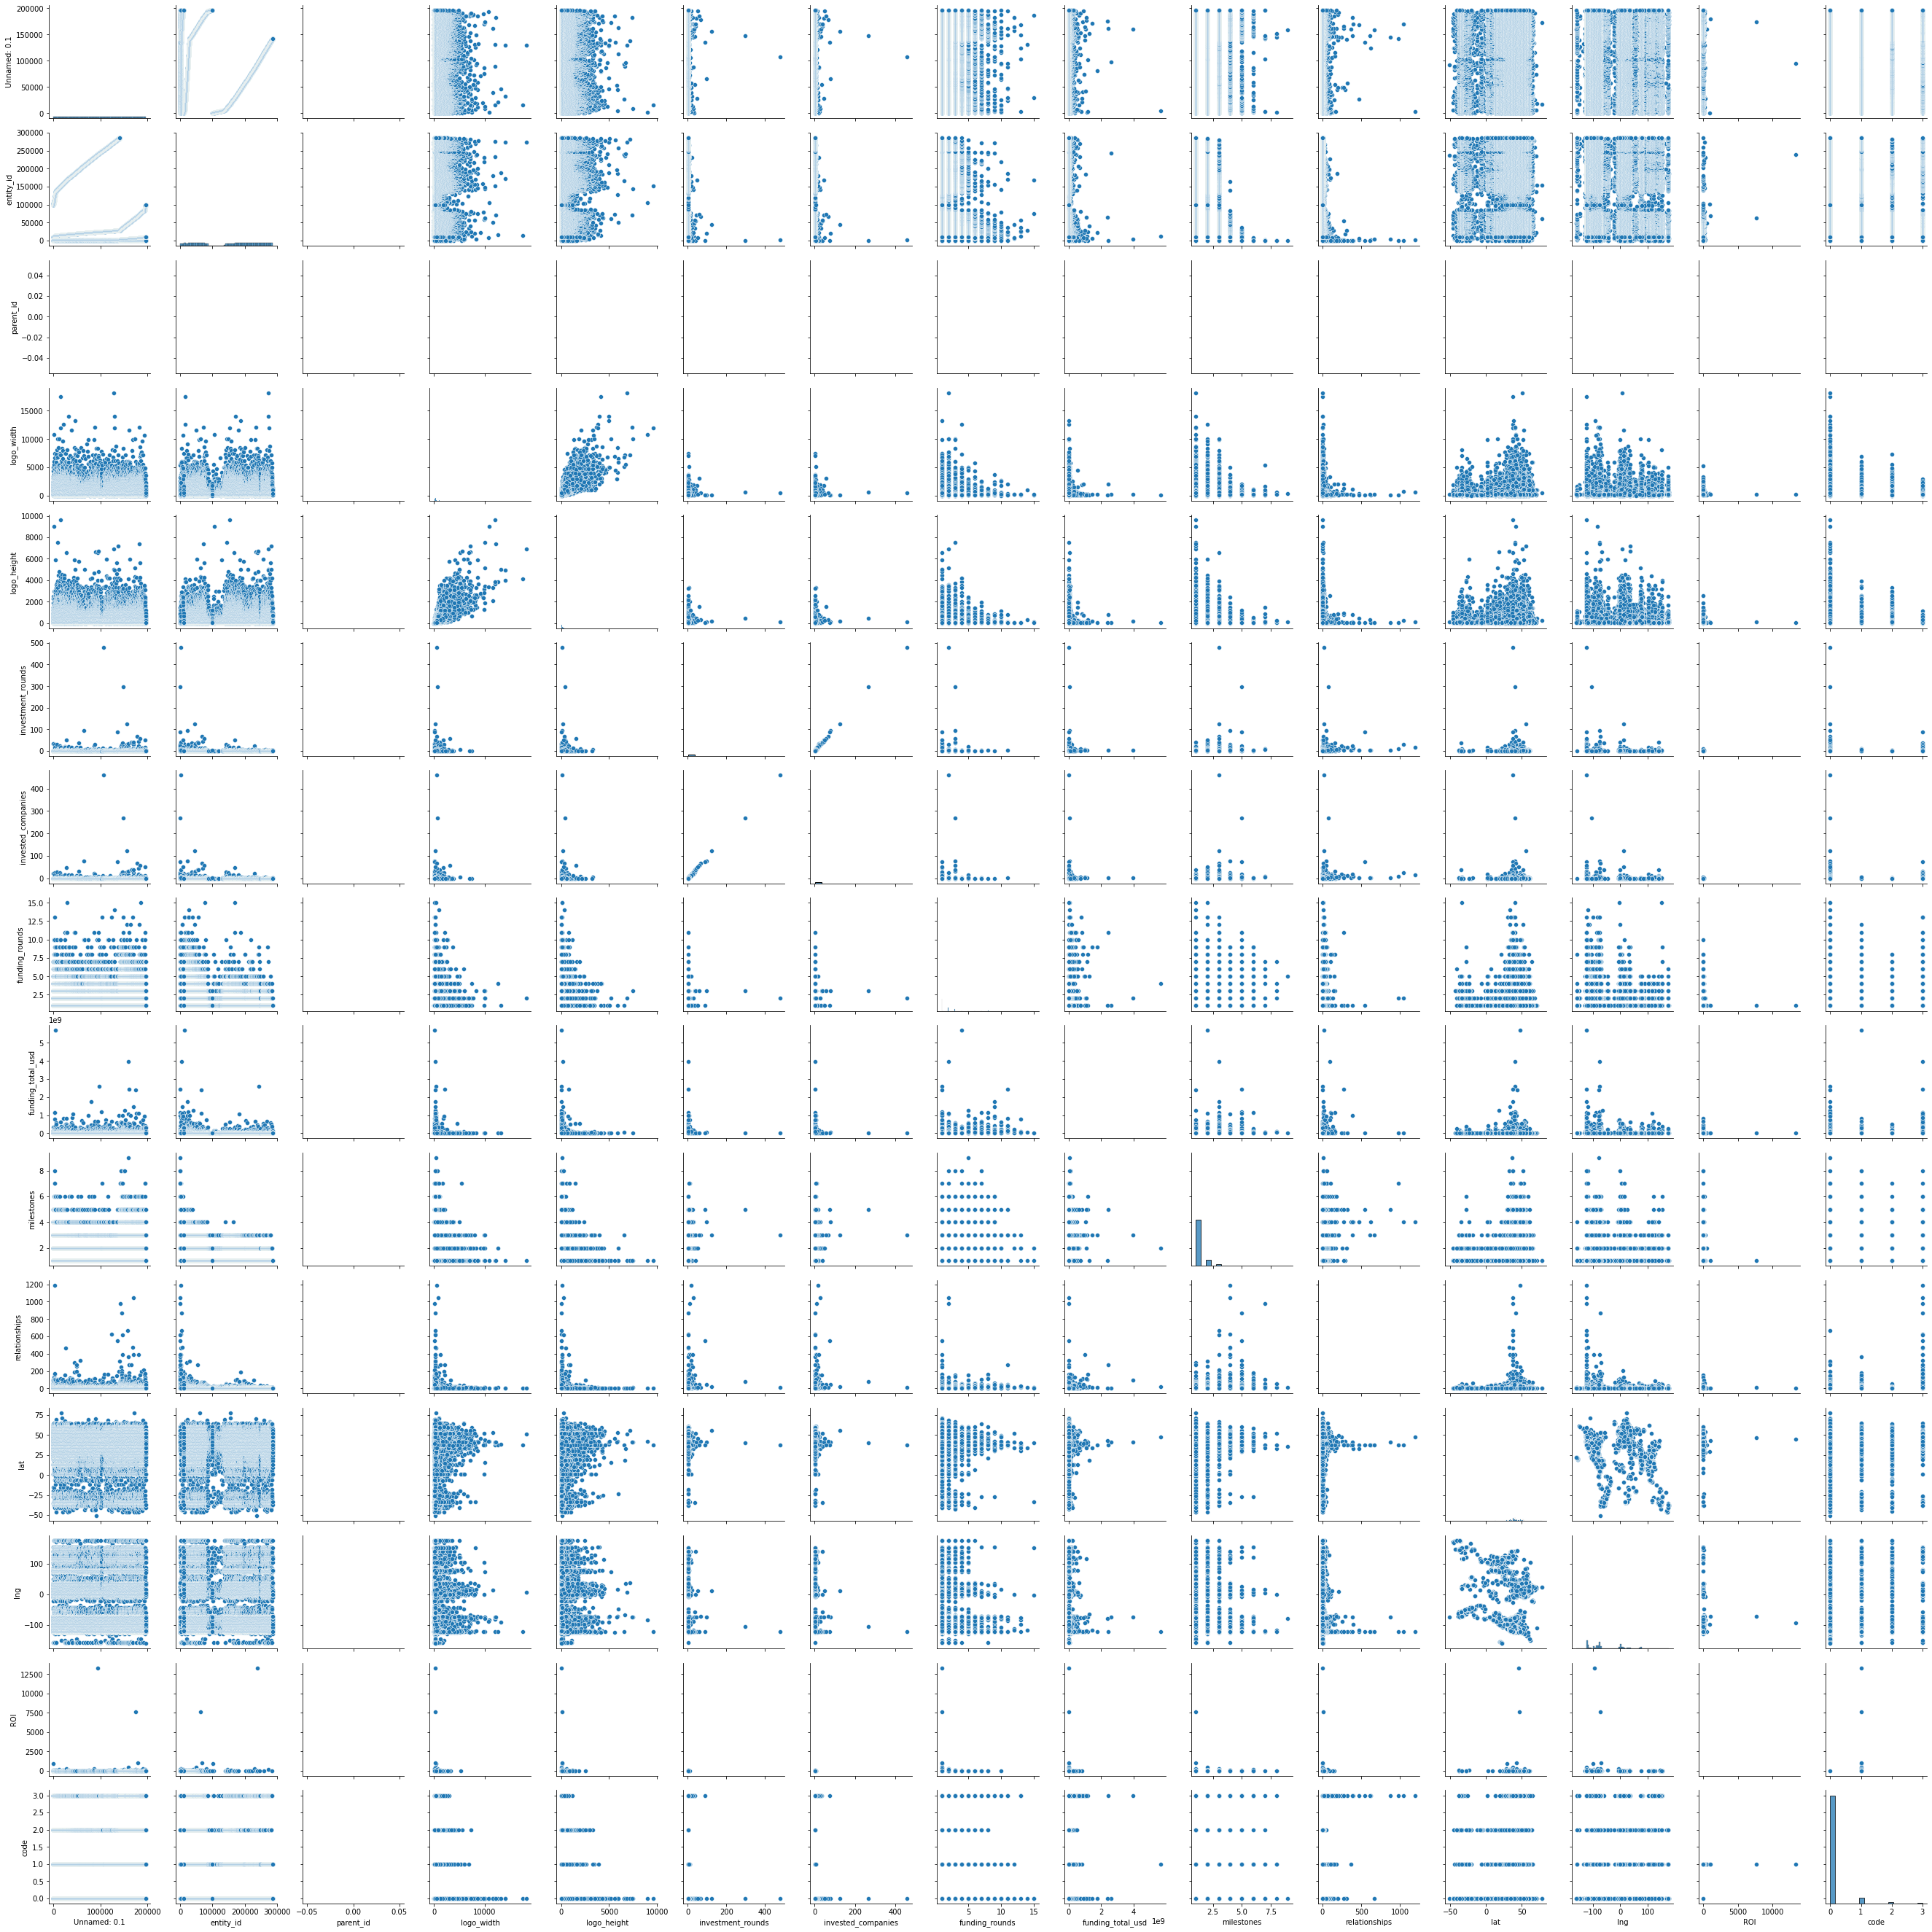

In [44]:
sns.pairplot(companies)
plt.show()

In [45]:
sns.scatterplot(x='funding_total_usd', y='status' , data=companies)

ValueError: Could not interpret value `status` for parameter `y`

<AxesSubplot:xlabel='funding_total_usd', ylabel='milestones'>

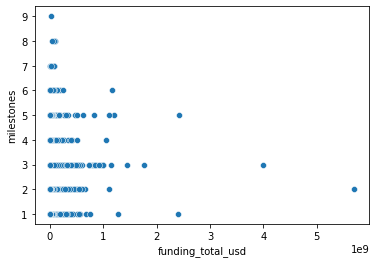

In [46]:
sns.scatterplot(x='funding_total_usd', y='milestones' , data=companies)

<AxesSubplot:xlabel='funding_total_usd', ylabel='funding_rounds'>

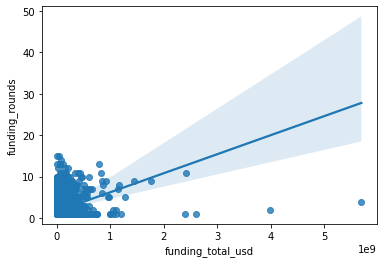

In [47]:
sns.regplot(x='funding_total_usd', y='funding_rounds', data=companies)

<AxesSubplot:xlabel='milestones', ylabel='funding_rounds'>

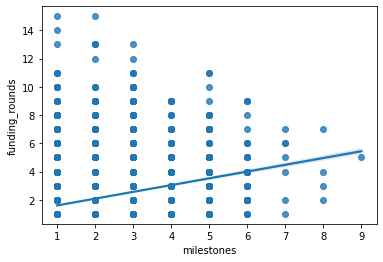

In [48]:
sns.regplot(x='milestones', y='funding_rounds', data=companies)

<AxesSubplot:xlabel='funding_total_usd', ylabel='funding_rounds'>

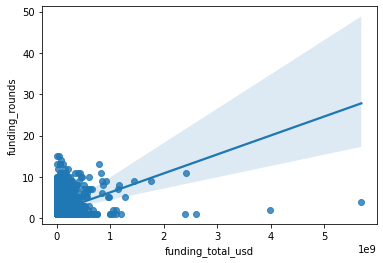

In [49]:
sns.regplot(x='funding_total_usd', y='funding_rounds', data=companies)

In [50]:
sns.scatterplot(x='funding_total_usd', y='status' , data=companies)

ValueError: Could not interpret value `status` for parameter `y`

In [52]:
sns.scatterplot(x='funding_rounds', y='status' , data=companies)

ValueError: Could not interpret value `status` for parameter `y`

In [53]:
sns.catplot(x='status', y='funding_rounds', data=companies, kind='bar')

ValueError: Could not interpret input 'status'

In [54]:
companies['funding_rounds'].corr(companies['funding_total_usd'])

0.24753809296282256

In [55]:
companies['funding_rounds'].corr(companies['milestones'])

0.3016616524603823

In [56]:
companies['code'] = pd.factorize(companies.status) [0]

AttributeError: 'DataFrame' object has no attribute 'status'

In [57]:
companies.status.value_counts()

AttributeError: 'DataFrame' object has no attribute 'status'

In [9]:
companies.code.value_counts()

0    183441
1      9394
2      2584
3      1134
Name: code, dtype: int64

In [10]:
companies.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI,code
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,9/18/2013,5.0,17.0,initial-importer,5/25/2007 6:51,4/13/2013 3:29,47.606209,-122.332071,15.5,0
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,6.0,initial-importer,5/31/2007 21:11,5/23/2008 23:23,34.021122,-118.396467,NaN,1
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,9/23/2011,4.0,12.0,initial-importer,8/6/2007 23:52,11/4/2013 2:09,37.562992,-122.325525,NaN,1
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,8/24/2008 16:51,9/6/2008 14:19,NaN,NaN,NaN,0
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,8/24/2008 17:10,9/6/2008 14:19,NaN,NaN,NaN,0


<AxesSubplot:xlabel='code', ylabel='count'>

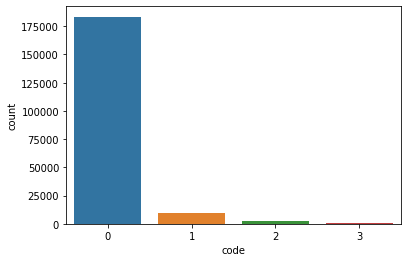

In [59]:
sns.countplot(companies.code)

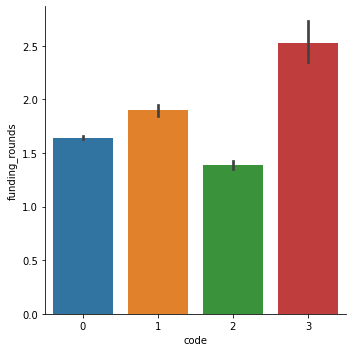

In [60]:
sns.catplot(x='code', y='funding_rounds', data=companies, kind='bar')

<AxesSubplot:xlabel='funding_rounds', ylabel='code'>

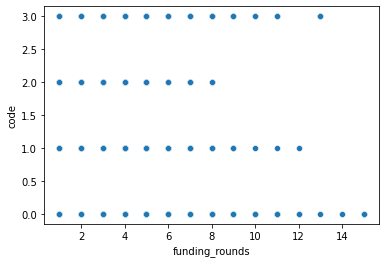

In [61]:
sns.scatterplot(x='funding_rounds', y='code' , data=companies)